## Content
- Linechart in case of multiple values
- Stacked countplot using seaborn

#### Importing and reading our data

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O vgsales.csv

--2022-12-15 10:24:57--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.164.115.123, 18.164.115.154, 18.164.115.84, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.164.115.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041483 (1.9M) [text/plain]
Saving to: ‘vgsales.csv’

vgsales.csv         100%[===================>]   1.95M  1.76MB/s    in 1.1s    

2022-12-15 10:24:59 (1.76 MB/s) - ‘vgsales.csv’ saved [2041483/2041483]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


#### How does a lineplot form when there are multiple values for the same data?

In the lecture, the games only had a single sales value per year.

#### But what if we want to see a trend for Publisher?

Every Publisher has multiple games, so multiple values for sales.

Let's check for top 3 publishers

In [ ]:
data['Publisher'].value_counts()

Electronic Arts                 1351
Activision                      1014
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
TYO                                1
Commseed                           1
Fortyfive                          1
Xing Entertainment                 1
MediaQuest                         1
Name: Publisher, Length: 578, dtype: int64

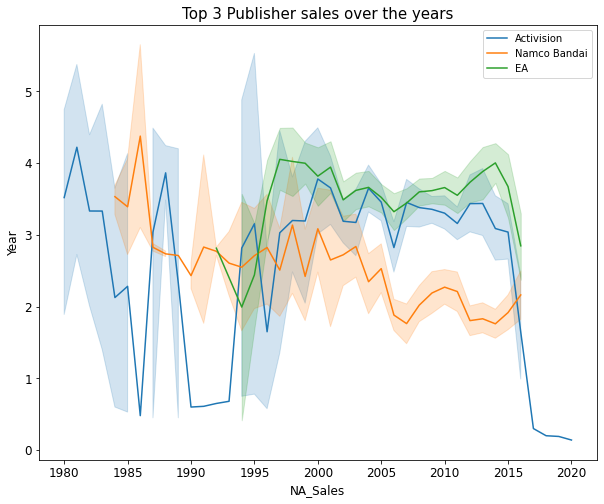

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Year', y='NA_Sales', data=data.loc[data['Publisher']=='Activision'], label='Activision')
sns.lineplot(x='Year', y='NA_Sales', data=data.loc[data['Publisher']=='Namco Bandai Games'],label='Namco Bandai')
sns.lineplot(x='Year', y='NA_Sales', data=data.loc[data['Publisher']=='Electronic Arts'],label='EA')
plt.title('Top 3 Publisher sales over the years', fontsize=15)
plt.xlabel('NA_Sales', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

Do you notice something different?

#### What is this shaded region around the seaborn lineplot?

- Since there are multiple values for each publisher, seaborn automatically plots the mean of all the values

- The shaded region is basically 95% confidence interval of the sales

Now let's filter our data for top 3 pubsliehers, genres and platforms as we did in the lecture

In [ ]:
top3_pub = data['Publisher'].value_counts().index[:3]
top3_gen = data['Genre'].value_counts().index[:3]
top3_plat = data['Platform'].value_counts().index[:3]
top3_data = data.loc[(data["Publisher"].isin(top3_pub)) & (data["Platform"].isin(top3_plat)) & (data['Genre'].isin(top3_gen))]
top3_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
13,2742,[Prototype 2],PS3,2012.0,Action,Activision,3.978349,3.727034,0.848807,2.792725,11.447989
16,1604,[Prototype],PS3,2009.0,Action,Activision,4.569217,4.108402,1.187272,3.339269,13.181205
19,1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,4.156030,4.346074,1.087977,3.390562,12.980643
21,4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,3.228043,2.738800,2.585598,3.652926,11.780257
...,...,...,...,...,...,...,...,...,...,...,...
16438,14938,Yes! Precure 5 Go Go Zenin Shu Go! Dream Festival,DS,2008.0,Action,Namco Bandai Games,1.087977,0.592445,1.087977,0.394830,3.509168
16479,10979,Young Justice: Legacy,PS3,2013.0,Action,Namco Bandai Games,2.186589,1.087977,3.409089,0.394830,7.359902
16601,11802,ZhuZhu Pets: Quest for Zhu,DS,2011.0,Misc,Activision,2.340740,1.525543,3.103825,0.394830,7.372592
16636,9196,Zoobles! Spring to Life!,DS,2011.0,Misc,Activision,2.697415,1.087977,2.760718,0.394830,6.915540


### Stacked Countplot



#### How can we visualize the distribution of genres for top-3 publishers?

We will need publishers on x-axis, and the number of games of each genre on y-axis!




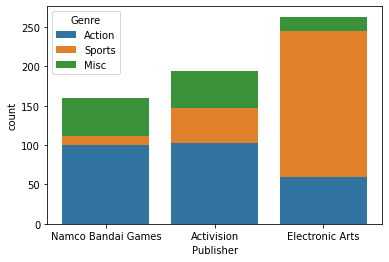

In [ ]:
ax=sns.countplot(x='Publisher',data=top3_data, hue='Genre',dodge=False)
bottoms = {}
for bars in ax.containers:
    for bar in bars:
        x, y = bar.get_xy()
        h = bar.get_height()
        if x in bottoms:
            bar.set_y(bottoms[x])
            bottoms[x] += h
        else:
            bottoms[x] = h
ax.relim()  # the plot limits need to be updated with the moved bars
ax.autoscale()
plt.show()

#### Code Explanation:
- We first use `dodge=False` parameter to not form the a dodged countplot
- Now, simply using `dodge=False` will make the position of each bar constant, but won't adjust the heights. 
  - The bars will end up overlapping, hence we need to manually update the heights for for the bars
- We use a `bottoms` dictionary, and for each genre, update the bar's height with the data
- After every updation, we set the height of bar using `bar.set_y`
- Finally we use `ax.relim()` and `ax.autoscale()` to update and scale the bars at the end as per the plot

Do print the data in the bottoms dictionary to get a cleared idea of how this is working!

#### What information can we infer from this stacked countplot?
- Even though EA has highest games, majority of its games are of `Sports` Type
- Comparitively, Action and Misc. type game industry is dominated by Namco and Activision more